In [4]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Lista 3 de Métodos Computacionais da Astronomia
## Aluno: Thiago Laidler Vidal Cunha
### (parte 2)

6 - [Algorítimos recursivos vs Iterativos]

In [6]:
def ehPrimo(num): #Função que define se o número é ou nao primo
    if num < 2:
        return False
    else:
        for n in range(2, num):
            if num % n == 0:
               return False
        return True

prim = [] # Criando lista dos primos

def questao6(n): #Função da questao
    if (ehPrimo(n)):
        prim.append(n)
        questao6(n-1)
    elif (n == 0):
        print(prim)
        print (len(prim))
        prim.clear()
    else:
        questao6(n-1)
        
questao6(50)
questao6(77)
questao6(15)

[47, 43, 41, 37, 31, 29, 23, 19, 17, 13, 11, 7, 5, 3, 2]
15
[73, 71, 67, 61, 59, 53, 47, 43, 41, 37, 31, 29, 23, 19, 17, 13, 11, 7, 5, 3, 2]
21
[13, 11, 7, 5, 3, 2]
6


In [ ]:
 ##ideia:
    ## Tentativa de usar array invés de lista
def ContadorPrimos(n):
    #primos = np.zeros((1,n))
    primos = []
    for i in range(1,n+1):
        if (ehPrimo(i)):
            # contador corte array qualquer
            primos.append(i)
    #np.sort(primos)
    # print primos[primos!=0]
    print (primos)
    print ('Total de: ' + str(len(primos)))

7 - [Funções + Algoritmo iterativo + Matplotlib plot]

In [7]:
def omega(T): ## função omega que recebe um período em dias
    return 2*np.pi/T

def soma_erro_total(pontos, T): 
    #Função soma erro total: recebe os dados {tempo, brilho e erro} e o período em dias. Já ajustado em chi**2
    t, b, e = pontos.T
    return np.sum(np.power((b - np.sin(omega(T)*t))/e, 2))

def SomaDife(a, b): # Função que retorna uma tupla com a soma e diferença entre os parâmetros
    return a + b, a - b

def melhor_omega(pontos, mini, maxi, passi): 
    # Função melhor omega: recebe os dados {tempo,brilho e erro}, as componentes de um range.
    infi = float('inf')
    best_T = 0
    mint = mini
    maxt = maxi
    passo = passi
    arredonda = 0
    while True:
        ts = [round(i, arredonda) for i in np.arange(mint, maxt, passo)]
        er = infi
        for t in ts:
            e = soma_erro_total(pontos, t)
            if e < infi:                       #selecionando os menores erros
                infi = e
                best_T = t
        if infi == er:
            break
        print('Melhor período: '+str(best_T)+' +/- '+str(infi))
        maxt, mint = SomaDife(best_T, passo)
        passo /= 10
        maxt += passo
        arredonda += 1
    return omega(best_T)

#### Desempacotando os dados das binárias e plotando

In [8]:
bin1 = np.loadtxt('binaria_eclipsante_1.dat')
bin_1 = pd.DataFrame(data = bin1,columns = ['Tempo (dias)', 'Brilho Relativo','Erro (brilho real)'])
bin2 = np.loadtxt('binaria_eclipsante_2.dat')
bin_2 = pd.DataFrame(data = bin2,columns = ['Tempo (dias)', 'Brilho Relativo','Erro (brilho real)'])
#bin_1.head()

 Binária 1:

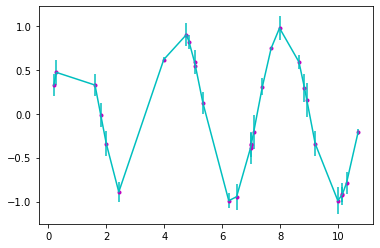

In [9]:
bin1_t = bin_1['Tempo (dias)']
bin1_b = bin_1['Brilho Relativo']
bin1_e = bin_1['Erro (brilho real)']
plt.errorbar(bin1_t, bin1_b, yerr=bin1_e, fmt='c-')
plt.plot(bin1_t, bin1_b,'m.')
plt.show()

 Binária 2:

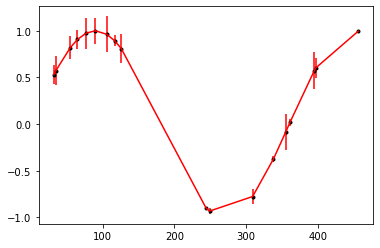

In [10]:
bin2_t = bin_2['Tempo (dias)']
bin2_b = bin_2['Brilho Relativo']
bin2_e = bin_2['Erro (brilho real)']
plt.errorbar(bin2_t, bin2_b, yerr=bin2_e, fmt='r-')
plt.plot(bin2_t, bin2_b, 'k.')
plt.show()

- Salvando o melhor omega de ambas

In [11]:
w1 = melhor_omega(bin1, 1, 5, 1)
print('\n\n')
w2 = melhor_omega(bin2, 1, 500, 10)
print('\nOmegas: ')
print(w1,w2)

Melhor período: 4 +/- 113055.15262733596
Melhor período: 3.6 +/- 2.8238971583361116e-27



Melhor período: 361 +/- 0.7337755242679542
Melhor período: 360.0 +/- 5.899896416249645e-29

Omegas: 
1.7453292519943295 0.017453292519943295


- Criando função sen(omega*t) de cada binária

In [12]:
from matplotlib.ticker import MultipleLocator

In [13]:
sen1 = np.arange(0, 12, 0.1)
sen2 = np.arange(0, 800, 10)

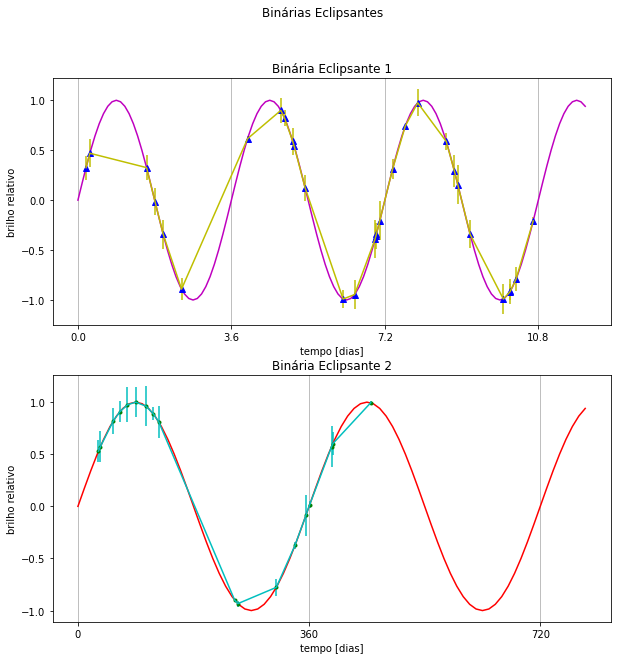

In [14]:
f, a = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

a[0].plot(sen1, np.sin(w1*sen1), 'm-')
a[0].errorbar(bin1_t, bin1_b, yerr=bin1_e, fmt='y-')
a[0].plot(bin1_t, bin1_b, 'b^')
a[0].grid(which='major', axis='x')
a[0].set_title('Binária Eclipsante 1')
a[0].set_xlabel('tempo [dias]')
a[0].set_ylabel('brilho relativo')
a[0].xaxis.set_major_locator(MultipleLocator(2*np.pi/w1))

a[1].plot(sen2, np.sin(w2*sen2), 'r-') 
a[1].errorbar(bin2_t, bin2_b, yerr=bin2_e, fmt='c-')
a[1].plot(bin2_t, bin2_b, 'g.')
a[1].grid(which='major', axis='x')
a[1].set_title('Binária Eclipsante 2')
a[1].set_xlabel('tempo [dias]')
a[1].set_ylabel('brilho relativo')
a[1].xaxis.set_major_locator(MultipleLocator(2*np.pi/w2))


f.suptitle('Binárias Eclipsantes')
plt.show()

**c)** Incluindo a fase na função ajustada:

In [15]:
%matplotlib widget
import ipywidgets as widgets

In [16]:
f1, a1 = plt.subplots(figsize=(6, 4))
a1.set_ylim([-1.5, 1.5])
a1.grid(True)

def slidersbin1sen(t):
    return np.sin(w1*(sen1+t))

@widgets.interact(t=(-18, 18, 0.5))
def att1(t=0):
    [l.remove() for l in a1.lines]
    a1.plot(sen1, slidersbin1sen(t), 'm-')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=0.0, description='t', max=18.0, min=-18.0, step=0.5), Output()), _dom_…

In [17]:
f2, a2 = plt.subplots(figsize=(6, 4))
a2.set_ylim([-1.5, 1.5])
a2.grid(True)

def slidersbin2sen(t):
    return np.sin(w2*(sen2+t))

@widgets.interact(t=(-720, 720, 10))
def att1(t=0):
    [l.remove() for l in a2.lines]
    a2.plot(sen2, slidersbin2sen(t), 'r-')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=0, description='t', max=720, min=-720, step=10), Output()), _dom_classes…